<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Linear Regression

The goal of univariate linear regression is to model the relationship between a single explanatory variable *x* and continuous valued target (response variable) *y*

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
x = np.linspace(1,10,20)
m = np.random.uniform(0.2,0.25, len(x))
c = np.random.uniform(-0.3,-0.1, len(x))
y = m*x + c

In [46]:
def error(x,y, w0,w1):
  z = w0+w1*x
  return np.mean((y-z)**2)

def plot(x,y,w0=None, w1=None, title=""):
  plt.scatter(x, y,marker='o');
  plt.xlabel("X");
  plt.ylabel("Y");
  
  plt.grid();
  if w0!=None and w1!=None:
    z = w1*x+w0
    plt.plot(x, z,'g')
    title += f" MSE:{error(x,y,w0,w1):0.3f}"
    plt.vlines(x,y,z,colors='r',linestyles='dotted')
  plt.title(title)

Say we have a set of data points like this. The goal of univariate linear regression is to find the best fitting line, given these data points. 

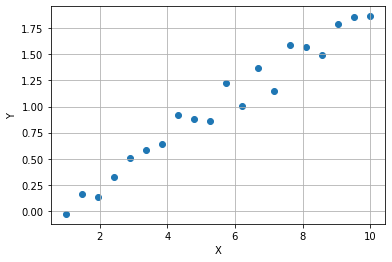

In [47]:
plot(x,y)

The linear model can be described by

$z_i = w_0 + w_1x_i$

where $w_0$ is the y intercept, and $w_1$ is the slope


Considering an arbitrary line as shown below, we can compute the error (red lines) between actual data and predicted values.

The squared error for each data point $i$ is given by 

SE = $(z_i-y_i)^2$

The mean squared error is given by 

$MSE = \frac{\displaystyle\sum_{i=1}^{n} (z_i-y_i)^2}{n}$ 

where $n$ is the number of samples in the dataset.

$MSE = \frac{1}{n}\displaystyle\sum_{i=1}^{n} (w_0 + w_1x - y_i)^2$ 



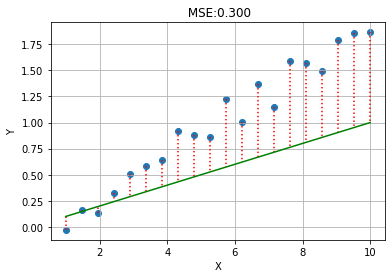

In [48]:
plot(x, y, 0.0,0.1)

To find the best fitting line, we would have to minimize this error. So the objective or cost function is given by

$J(w_0,w_1) = \frac{1}{2}MSE$

$\therefore J(w_0,w_1) = \frac{1}{2n}\displaystyle\sum_{i=1}^{n} (w_0 + w_1x - y_i)^2$

The $\frac{1}{2}$ is for mathematical simplicity, so that it cancels out when we take the derivative.

Steps
1. Initialize $w_0$ and $w_1$ to random values
2. Compute z
3. Compute J
4. Compute $\frac{\partial J}{\partial w_1}$
5. Compute $\frac{\partial J}{\partial w_0}$
6. Update weights $w_0$ and $w_1$
7. Go back to step 2 and iterate till convergence 



Partial derivative of the cost function $J$ w.r.t. $z_1$ is given by-

$\frac{\partial J}{\partial z_1} = \frac{1}{2n}[(z_1 - y_1)^2 + (z_2 - y_2)^2 + ...+(z_n - y_n)^2]$

Since everything but the first term is a constant w.r.t. $z_1$ -

$\frac{\partial J}{\partial z_1} = \frac{2}{2n}(z_1 - y_1)$

$\frac{\partial J}{\partial z_1} = \frac{(z_1 - y_1)}{n}$

In general -

$\boxed{\frac{\partial J}{\partial z_i} = \frac{(z_i-y_i)}{n}}\tag{1}$

Partial derivative of $z_1$ w.r.t $w_1$

$\frac{\partial z_1}{\partial w_1} = \frac{\partial}{\partial w_1}(w_1 x_1 + w_0)$

$\frac{\partial z_1}{\partial w_1} = x_1$

In general

$\boxed{\frac{\partial z_i}{\partial w_1} = x_i}\tag{2}$

Partial derivative of $z_1$ w.r.t $w_0$

$\frac{\partial z_1}{\partial w_0} = \frac{\partial}{\partial w_0}(w_1 x_1 + w_0)$

In general

$\boxed{\frac{\partial z_i}{\partial w_0} = 1}\tag{3}$

Partial derivative of $J$ w.r.t. $w_1$

$\frac{\partial J}{\partial w_1} = \displaystyle\sum_{i=1}^{n} \frac{\partial J}{\partial z_i} \frac{\partial z_i}{\partial w_1} $

$\boxed{\frac{\partial J}{\partial w_1} = \displaystyle\sum_{i=1}^{n}\frac{(z_i-y_i)}{n} x_i }\tag{4}$


Partial derivative of $J$ w.r.t $w_0$

$\frac{\partial J}{\partial w_0} = \displaystyle\sum_{i=1}^{n}\frac{\partial J}{\partial z_i} \frac{\partial z_i}{\partial w_0} $

$\boxed{\frac{\partial J}{\partial w_0} = \displaystyle\sum_{i=1}^{n}\frac{(z_i-y_i)}{n}}\tag{5}$

Compute new weights $w_0$ and $w_1$

$\boxed{w_{0_{new}} = w_0 - \alpha \frac{\partial J}{\partial w_0}}\tag{6}$

$\boxed{w_{1_{new}} = w_1 - \alpha \frac{\partial J}{\partial w_1}}\tag{7}$

where $\alpha$ is the learning rate


In [49]:
w0, w1 = np.zeros(2)
n = len(y)
alpha = 0.02
tgt_mse = 0.01
hist = {"dJdw0":[],"dJdw1":[],"w0":[], "w1":[],"mse":[]}
for i in range(1000):
  z = w0+w1*x
  mse = error(x, y, w0, w1)
  dJdw0 = np.sum((z-y)/n)
  dJdw1 = np.sum(((z-y)*x)/n)
  w0_ = w0-alpha*dJdw0 
  w1_ = w1-alpha*dJdw1
  mse_ = error(x,y, w0_, w1_) 
  
  hist["dJdw0"].append(dJdw0)
  hist["dJdw1"].append(dJdw1)
  hist["w0"].append(w0)
  hist["w1"].append(w1)
  hist["mse"].append(mse)
  
  if mse<=tgt_mse:
    print(f"Converged after {i+1} steps")
    break
  else:
    w0,w1=(w0_,w1_)

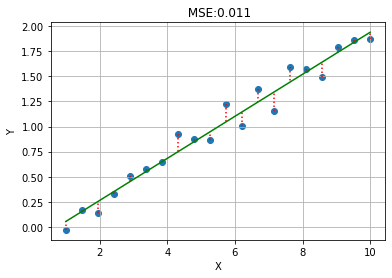

In [50]:
plot(x,y, w0, w1)

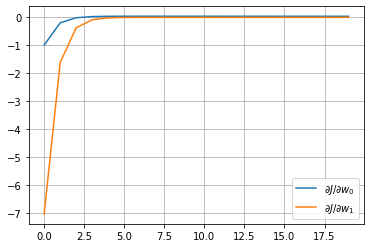

In [51]:
plt.plot(hist["dJdw0"][:20], label=r"$\partial J/\partial w_0$")
plt.plot(hist["dJdw1"][:20], label=r"$\partial J/\partial w_1$")
plt.grid();
plt.legend();

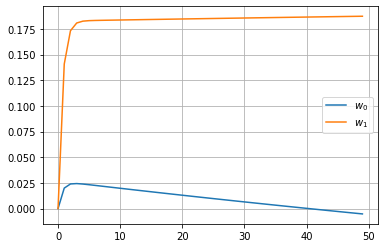

In [52]:
plt.plot(hist["w0"][:50], label=r"$w_0$")
plt.plot(hist["w1"][:50], label=r"$w_1$")
plt.grid()
plt.legend();

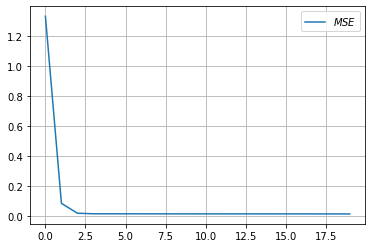

In [53]:
plt.plot(hist["mse"][:20], label=r"$MSE$");
plt.grid()
plt.legend();

### Model evaluation

Mean Squared Error is a quantitative measure of how well the model fits the data. However, MSE is unbounded and is affected by feature scaling. i.e. MSE for the same model will change if data is scaled.

**Coefficient of determination** ($R^2$) is a standardized version for better interpretability. $R^2$ is the fraction of response variance that is captured by the model, and is defined as -

$R^2 = 1 - \frac{SSE}{SST}$

$SSE = \displaystyle\sum_{i=1}^{n} (z_i-y_i)^2$

$SST = \displaystyle\sum_{i=1}^{n} (y_i-\mu_y)^2$

$R^2$ is bounded between 0 and 1 for the training data.

If $R^2=1$, the model fits the data perfectly.

$R^2$ can be negative when evaluated on previously unseen (test) data.

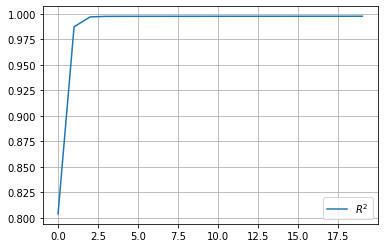

In [54]:
rsq = 1- hist["mse"]/ np.sum((y-y.mean())**2)
plt.plot(rsq[:20], label=r"$R^2$");
plt.grid()
plt.legend();

## Analytical Solution

$\boxed{w = (x^Tx)^{-1}x^Ty}$

Pros:

- Guaranteed to find optimal solution

Cons:

- Computationally expensive with large datasets
- Fails if the matrix is singular (non-invertible)


In [56]:
xb = np.hstack((np.ones((x.shape[0],1)), x.reshape(x.shape[0],1)))
w = np.zeros(1)
z = np.linalg.inv(np.dot(xb.T, xb))
w = np.dot(z, np.dot(xb.T,y))
print(f"Analytical solution: w0={w[0]:0.4f}; w1={w[1]:0.4f}")
print(f"Numerical solution: w0={w0:0.4f}; w1={w1:0.4f}")

Analytical solution: w0=-0.1582; w1=0.2098
Numerical solution: w0=-0.1544; w1=0.2092
